In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt

warnings.simplefilter('ignore')

# Описание проекта
Маркетинговый отдел крупного интернет-магазина предоставил нам список гипотез для увелечения выручки.Нам необходимо их приоритизировать, а также провести A/B-тестов , а также провести анализ результатов.

План проекта:
- Часть 1. Приоритизация гипотез.
- Часть 2. Анализ A/B-теста
 

In [2]:
try:
    hypothesis = pd.read_csv("C:/Users/kulum/Downloads/hypothesis.csv")
    orders = pd.read_csv("C:/Users/kulum/Downloadsorders.csv")
    visits = pd.read_csv("C:/Users/kulum/Downloads/visitors.csv")
except:
    visitors = pd.read_csv("https://code.s3.yandex.net/datasets/visitors.csv")
    hypothesis = pd.read_csv("https://code.s3.yandex.net/datasets/hypothesis.csv")
    orders = pd.read_csv("https://code.s3.yandex.net/datasets/orders.csv")


# Часть 1. Приоритизация гипотез.


Итак в нашем арсенали  9 гипотез по увеличению выручки интернет-магазина с указанными параметрами.

In [3]:
pd.set_option('colwidth',110)
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
hypothesis['ICE'] = (hypothesis.impact* hypothesis.confidence/hypothesis.efforts).round(2)
hypothesis.sort_values(by = 'ICE',ascending = False).head(5)

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00


Согласно рейтинг ICE наиболее популярные гипотезы:
- 1.Запустить акцию, дающую скидку на товар в день рождения
- 2.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
- 3.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- 4.Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
- 5.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

In [5]:
hypothesis['RICE'] = (hypothesis.reach* hypothesis.impact * hypothesis.confidence/hypothesis.efforts).round(2)
hypothesis.sort_values(by = 'RICE',ascending = False).head()

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


Согласно рейтинг RICE наиболее популярные гипотезы:
- 1.Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- 2.Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
- 3.Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- 4.Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию	
- 5.Запустить акцию, дающую скидку на товар в день рождения	

## Вывод
Если присмотреться к двум таблицам, то можно увидеть первая 5 пятерка и по ретингу ICE, и по рейтингу RICE одинаковая, но в разной последовательности. Связано это с тем , что в рейтинге RICE  учитывается еще такой фактор Reach(охват аудитории).Например ,по рейтингу ICE  гипотеза: "Запустить акцию, дающую скидку на товар в день рождения" - на первом месте ,с 16.2 баллами, но в рейтинге RICE только на 5 месте, так как покзатель reach e у нее минимальный - 1. Так как модель RICE учитывает еще такой фактор как охват аудитории, что важно для интернет-магазина,будем отталкивается от приоритезации этой модели.

# Часть 2. Анализ A/B-теста

In [6]:
display(orders.head())
orders.columns = orders.columns.str.lower()
visitors.head()


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [7]:
orders.info(), visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


(None, None)

Итак перед нами две таблицы orders, которая имеет 1197 записи и не имеет Nan-значение, и visitors,которая имеет 62 записи и не имеет Nan-значение. В таблицах поменяем тип данных для столбца date object на datetime


In [8]:
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [9]:
print('Количество групп в АВ-тесте: ', orders['group'].nunique(),
       '\nДата начала теста', orders.date.min(),
         '\nДата окончания теста', orders.date.max(),
'\nКоличество пользователей в группе А -',
      orders[orders.group == 'A']['visitorid'].nunique(),
'\nКоличество пользователей в группе B -', orders[orders.group == 'B']['visitorid'].nunique(),
 '\nКоличество пользователей попавших в обе группы -',
orders.loc[orders.group == 'B','visitorid'].drop_duplicates().isin(orders.loc[orders.group== 'A','visitorid'].unique()).sum())

Количество групп в АВ-тесте:  2 
Дата начала теста 2019-08-01 00:00:00 
Дата окончания теста 2019-08-31 00:00:00 
Количество пользователей в группе А - 503 
Количество пользователей в группе B - 586 
Количество пользователей попавших в обе группы - 58


### Построим рафик кумулятивной выручки по группам. 

In [10]:
datesGroups = orders[['date','group']].drop_duplicates() 
ordersAggregated = (datesGroups.apply(lambda x: 
            orders[np.logical_and(orders['date'] <= x['date'],
            orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 
      'visitorid' : 'nunique', 'revenue' : 'sum'}), axis=1)
.sort_values(by=['date','group'])
.rename(columns = {'transactionid':'transaction','visitorid': 'visitor'}))
ordersAggregated
visitorsAggregated = (datesGroups.apply(lambda x : 
                    visitors[np.logical_and(x['date']>= visitors['date'], x['group'] == visitors['group'])]
                    .agg({'date':'max','group':'max','visitors':'sum'}),axis = 1).sort_values(by = ['date','group'])
                    )
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])\
.rename(columns = {'visitor':'byuer'})
#Создадим также сразу столбец с конверсиями
cumulativeData['conversion'] = cumulativeData['transaction']/cumulativeData['visitors']

cumulativeData

,date,group,transaction,byuer,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,5559398,17708,0.033657
58,2019-08-30,A,545,493,4022970,18037,0.030216
59,2019-08-30,B,620,567,5774631,18198,0.034070
60,2019-08-31,A,557,503,4084803,18736,0.029729


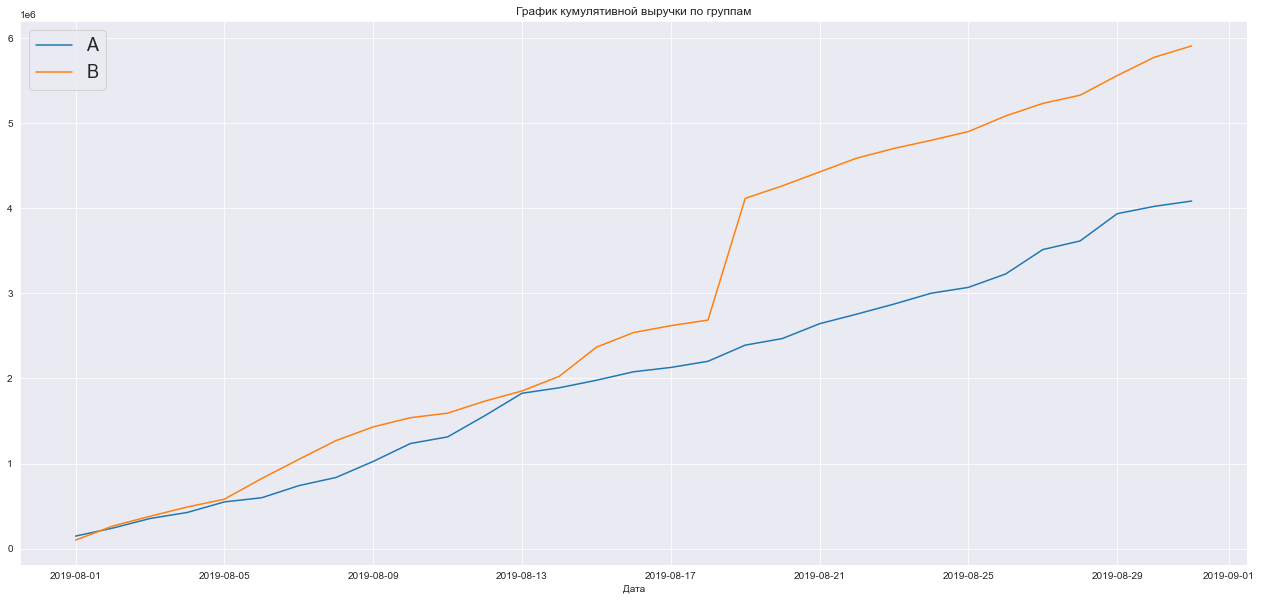

In [11]:
cumulativeDataA = cumulativeData[cumulativeData.group == 'A'][['date','revenue','transaction','conversion']]
cumulativeDataB = cumulativeData[cumulativeData.group == 'B'][['date','revenue','transaction','conversion']]
plt.rcParams['figure.figsize']= 22,10
sns.set_style('darkgrid')

plt.plot(cumulativeDataA.date,cumulativeDataA.revenue,label = 'A')
plt.plot(cumulativeDataB.date,cumulativeDataB.revenue, label = 'B')
plt.title('График кумулятивной выручки по группам')
plt.rc('font', size= 18 ) 
plt.xlabel('Дата')
plt.legend();

С 1 августа до пятого группа А и группа B показывали одинаковый рост, затем группа B показывала рост чуть лучше чем группа А. 13 августа группы показывают одинаковые значения.После 13 августа группа Б растет сильнее группы А, а 18-19 августа происходит значительный разрыв в росте между А и B.Скорее всего количесто заказов с 18 августа  у группы Б выросло или появились очень дорогие заказы.Группы практически равномерно показывали рост весь месяц.

## Построим график кумулятивного среднего чека по группам. 

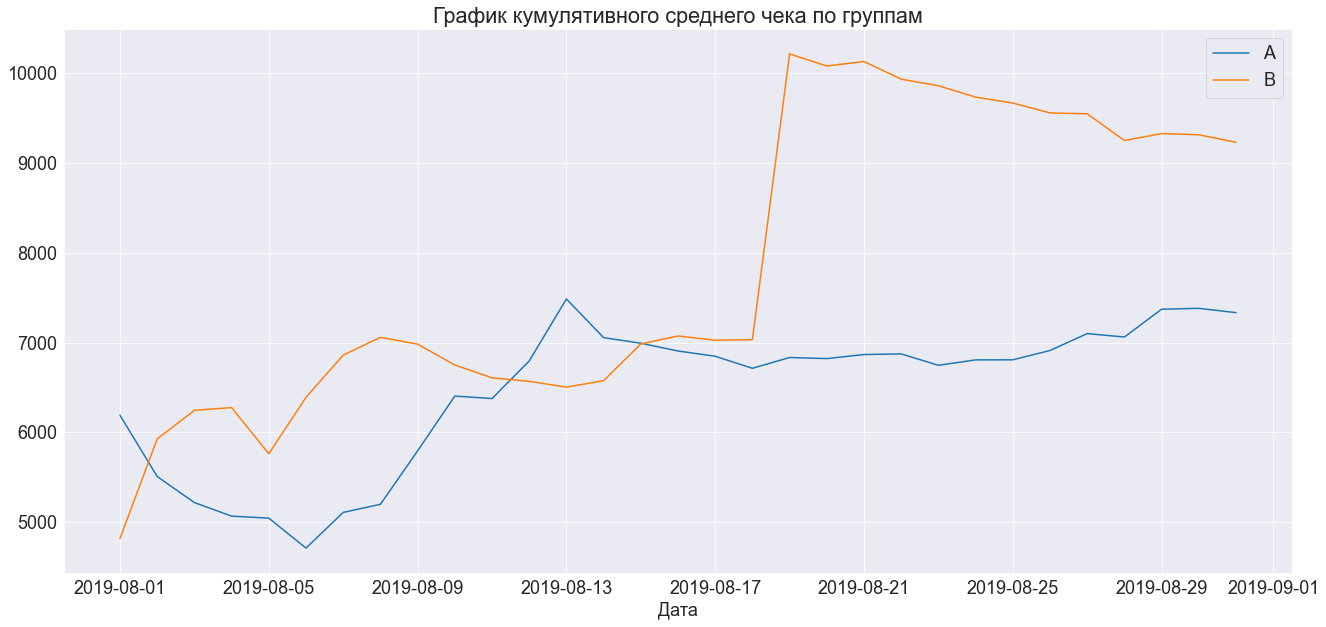

In [12]:
plt.plot(cumulativeDataA.date,cumulativeDataA.revenue/cumulativeDataA.transaction, label = 'A')
plt.plot(cumulativeDataB.date,cumulativeDataB.revenue/cumulativeDataB.transaction, label = 'B')
plt.title('График кумулятивного среднего чека по группам')
plt.rc('font', size= 18 ) 
plt.xlabel('Дата')
plt.legend();

C 1 августа сегмент B по среднему чеку показывал рост с небольшими просадками,а сегмент А вначале просел ,упал ниже 5000 но с 7 августа показал рост и к середине месяца группы А и B практически сравнялись. Затем 18-19 августа у сегмента B произошел резкий скачок стоимости среднего чека ,цена выросла с 7000 и стала   выше 10000

## Построим график относительного изменения кумулятивного среднего чека группы B к группе A.


Text(0.5, 0, 'Дата')

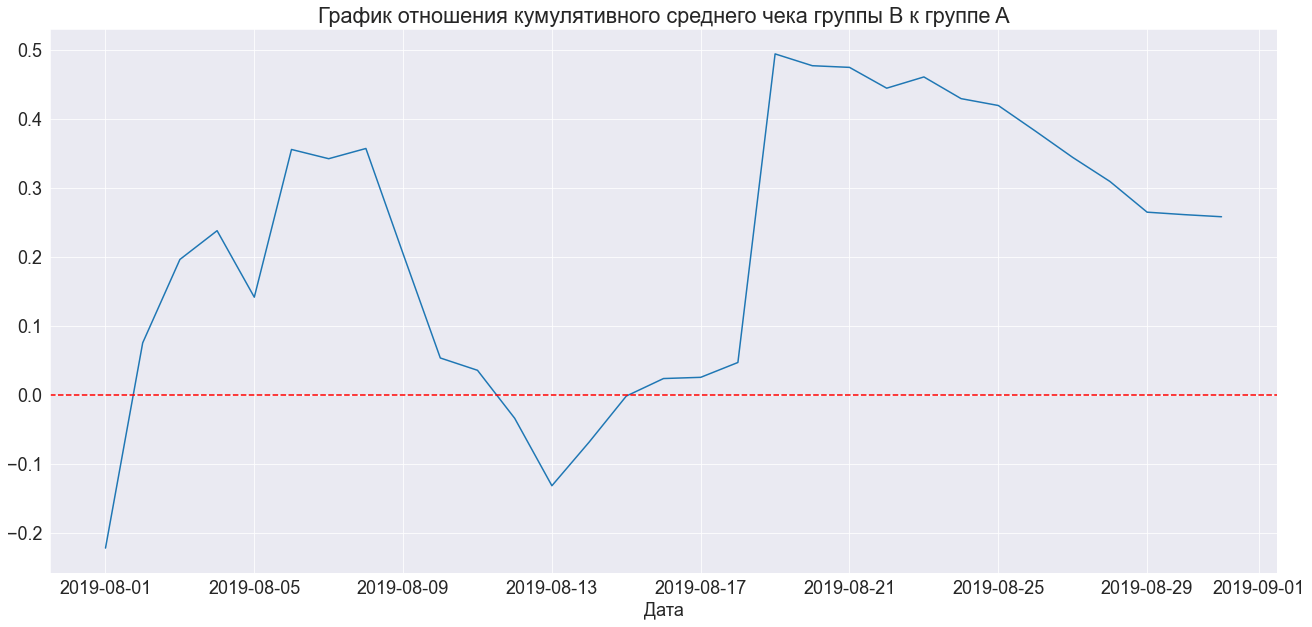

In [13]:
cumulativedata_A_B = cumulativeDataA.merge(
    cumulativeDataB, left_on = 'date', 
    right_on = 'date',suffixes = ['A', 'B'])
plt.plot(cumulativedata_A_B.date, (cumulativedata_A_B.revenueB/cumulativedata_A_B.transactionB)/
         (cumulativedata_A_B.revenueA/cumulativedata_A_B.transactionA)-1,)
plt.title('График отношения кумулятивного среднего чека группы B к группе A')
plt.axhline(y = 0,color = 'red',linestyle = '--')
plt.rc('font', size= 21 ) 
plt.xlabel('Дата')

 С 1 августа  группа Б в среднем больше группы А на 30-40%, с 11 до 15 августа группа А на 10-15% больше группы Б. А вот с 18-19 группа Б больше группы А на 50% и в среднем до 25 августа А больше Б на 40+%, с 29.08 и до конца месяца сегмент Б больше сегмента А на 25+%
 

## Построим график кумулятивного среднего количества заказов на посетителя по группам. 

Text(0.5, 0, 'Дата')

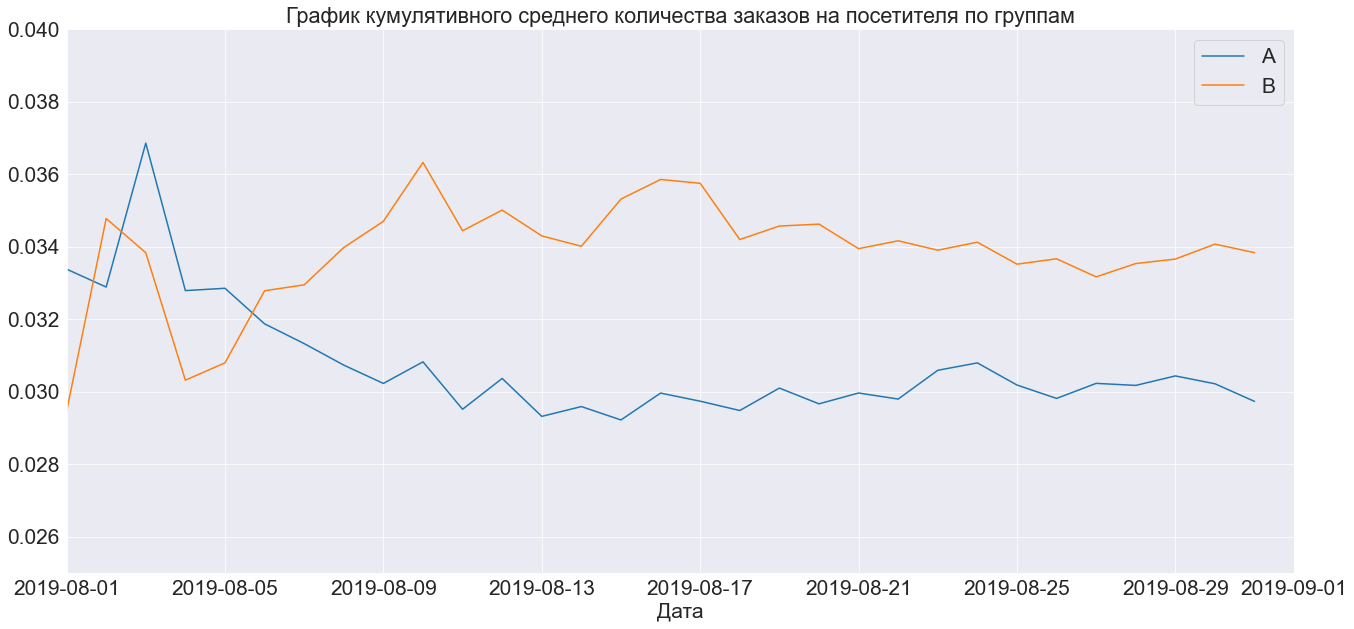

In [14]:
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])
plt.rc('font', size= 18 ) 
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')



Конверсия у покупателей группы А идет с начала месяца 0.034 и доходит до 0.03 , пользователей группы Б начинается с 3% и заканчиавется затем увеличивается до 3.6 и доходит до 3.4 к концу месяца. В среднем конверсия у пользователей Б больше чем у А 

## Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 


Text(0.5, 0, 'Дата')

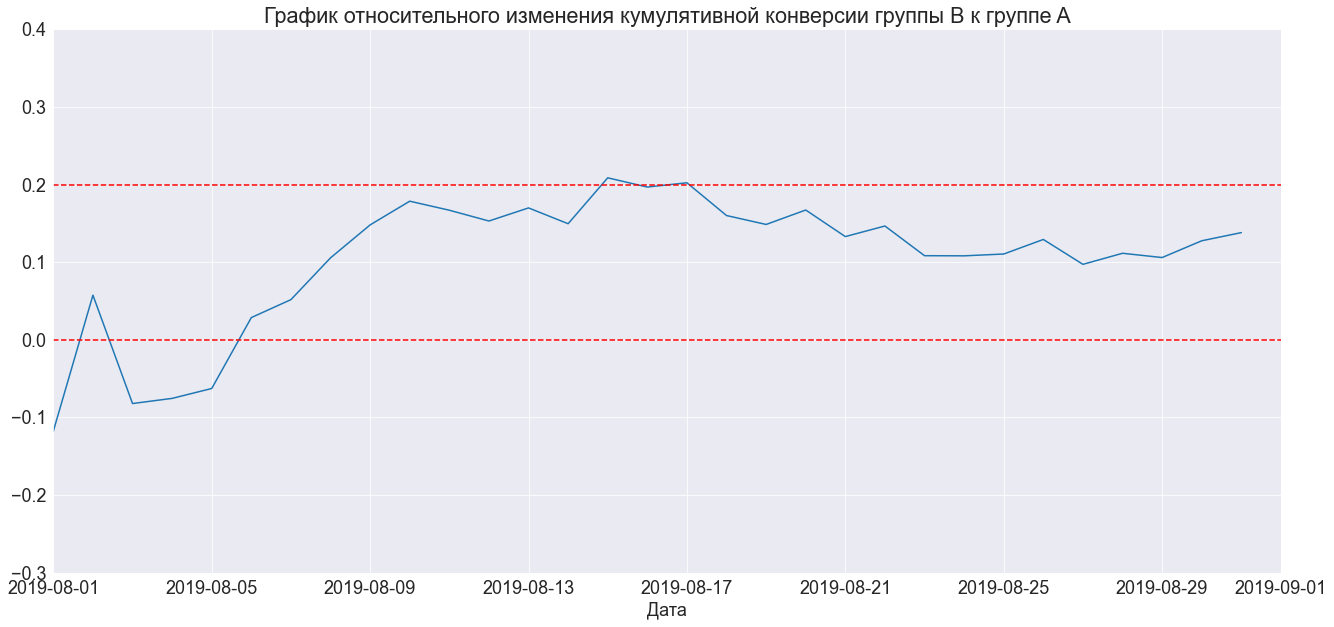

In [15]:
plt.plot(cumulativedata_A_B.date,cumulativedata_A_B.conversionB/cumulativedata_A_B.conversionA-1)
plt.title('edf;t')
plt.axhline(y = 0.2 ,color = 'red', linestyle = '--')
plt.axhline(y = 0,color = 'red', linestyle = '--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1),-0.3,0.4])
plt.rc('font', size= 18 ) 
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.xlabel('Дата')


До 5 августа конверсия у сегмента А была лучше, чем у Б, после 5 августа конверсия лучше  у группы Б ,разница доходит до 20 процентов, но в среднем держится на 12-15% 

## Построим точечный график количества заказов по пользователям. 

,1023,591,569,487,44,744,55,917,299,897,393,114,619,340,937
visitorid,4256040402,2458001652,2378935119,2038680547,199603092,3062433592,237748145,3803269165,1230306981,3717692402,1614305549,457167155,2587333274,1404934699,3908431265
transactionid,11,11,9,8,5,5,5,5,5,5,4,4,4,3,3


Text(0, 0.5, 'Количество заказов')

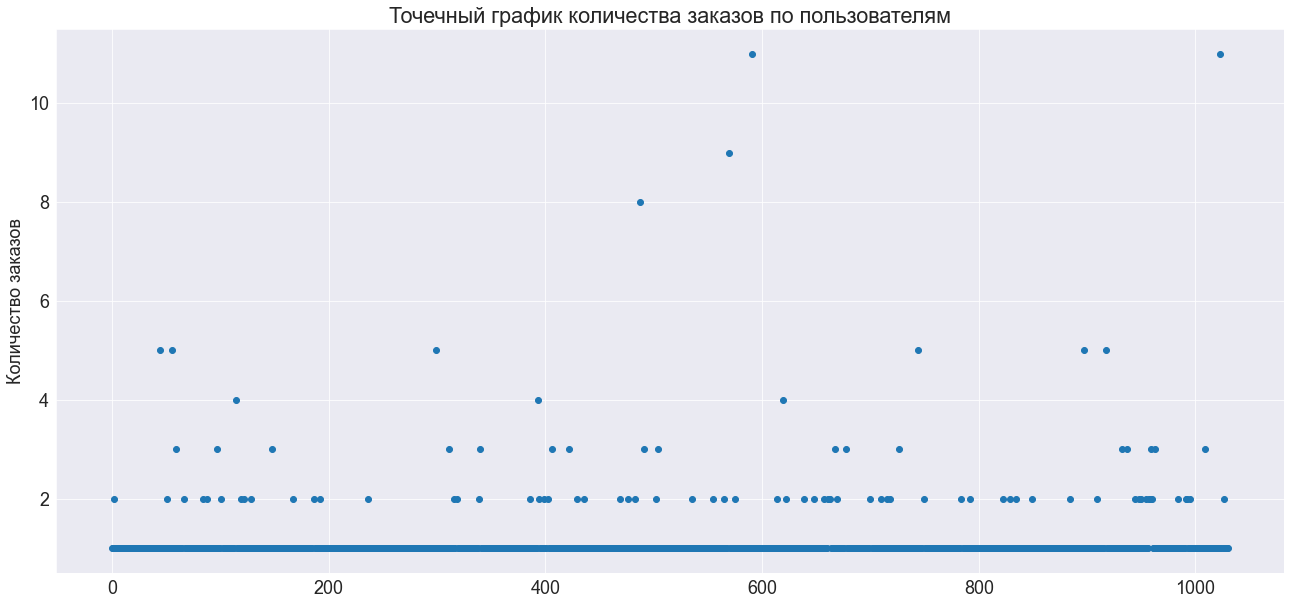

In [16]:
ordersUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
display(ordersUsers.sort_values(by = 'transactionid', ascending = False).head(15).T)
x_values = pd.Series(range(len(ordersUsers['transactionid'])))
plt.scatter(x_values, ordersUsers['transactionid'])
plt.title('Точечный график количества заказов по пользователям')

plt.rc('font', size= 18 ) 

plt.ylabel('Количество заказов')

Как и ожидалось большинство пользователей сделали по заказу, но есть и те кто сделал 2 и более.Их точная доля не ясна — непонятно, считать их аномалиями или нет. Поэтому посчитаем выборочные перцентили количества заказов на одного пользователя

## Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.


In [17]:
print(np.percentile(ordersUsers['transactionid'], [ 90,95, 99]),
     "\nПользователи  с 2 заказами-" ,ordersUsers[ordersUsers.transactionid == 2].count()['transactionid'],
     "\nПользователи  с 3 и более -",  ordersUsers[ordersUsers.transactionid > 2].count()['transactionid'] ) 

[1. 2. 4.] 
Пользователи  с 2 заказами- 64 
Пользователи  с 3 и более - 30


Итак не более 5 % покупателей оформили больше двух закаказов и не более 1% пользователей совершили 4 и более покупки.Пользователей с 3 и более заказами уберем ,с двумя оставим 

## Построим точечный график стоимостей заказов.

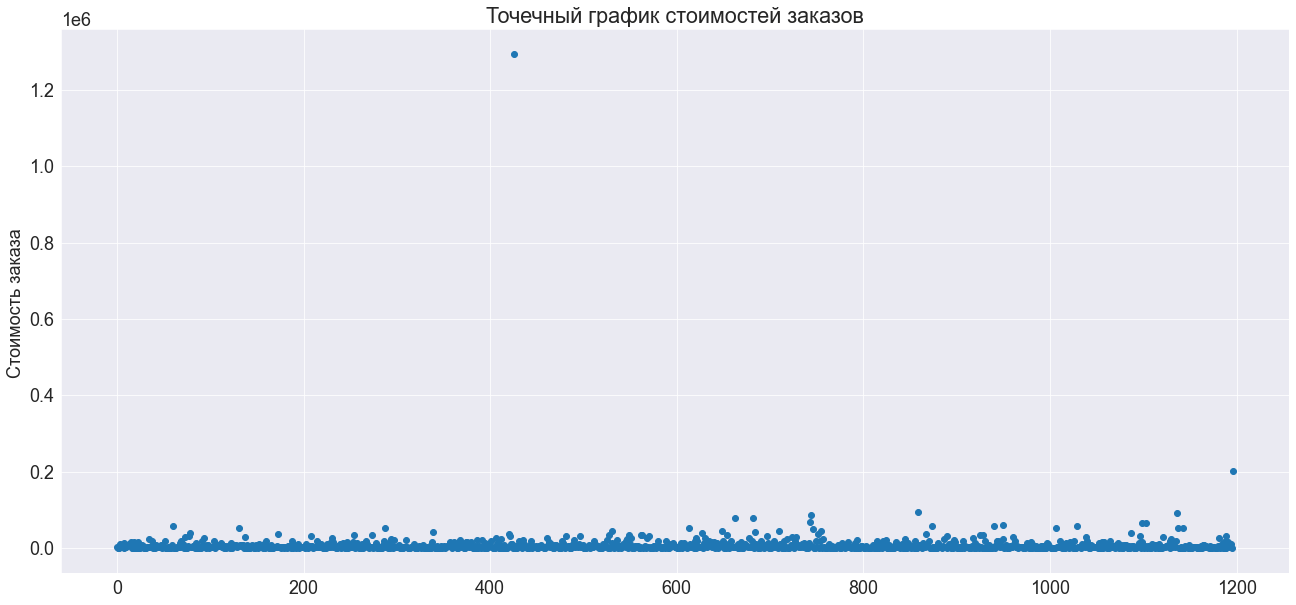

In [18]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа ')
plt.rc('font', size= 18 )

НА графике видно заказ на сумму более 1.2 миллионов,что ,конечно, является анамалией.Большинство заказов меньше 100000

## Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [19]:
print(np.percentile(orders['revenue'], [90,95, 99])) 

[18168.  28000.  58233.2]


Итак 10% покупателкей совершили покупку на сумму более 18168, 5%  на сумму более 28000, 1% -  58233.2. Нижней границей будет 28000

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

- Нулевая гипотеза -  различий в конверсии между группами нет.

- Альтернативная гипотеза -  различия в конверсии между группами есть.

In [20]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': 'nunique', 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': 'nunique', 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsersB.columns = ['userId', 'orders'] 

In [21]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


p-value значительно меньше 0.05 Отсюда следует, что разница между конверсиями все же есть. Отношение Конверсии группы В к конверсии группы А равно 13,8%, в пользу Б

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. 



 - Нулевая гипотеза - различий в среднем чеке между группами нет.

- Альтернативная гипотеза - различия в среднем чеке между группами есть.

In [22]:
print('{0:.4f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

0.7293
0.259


p-value значительно превосходит 0.05 ,а это значит , что статистически значимых отличий в среднем чеке между группами нет. разница среднего чека между А И Б - 25,9%.

## Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.


- Нулевая гипотеза -  различий в конверсии между группами по «очищенным» данным нет.

- Альтернативная гипотеза -  различия в конверсии между группами по «очищенным» данным есть.

In [23]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered,alternative="two-sided")[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 


0.01304
0.173


P-value значительно меньше 0,05,а это значит, что нулевую гипотезу отвергаем,также как и сырыми данными.У Сегмент В конверсия оказалась лучше  на 17,3%. До очистки было 13,8.

## Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


 - Нулевая гипотеза - различий в среднем чеке между группами  по «очищенным» данным нет.

- Альтернативная гипотеза - различия в среднем чеке между группами по «очищенным» данным есть

In [24]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],alternative="two-sided"
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


p-value - 0.738 осталось примерно на таком же уровне, что и до очистки данных,а отсюда следует что нулевую гипотезу мы отвергнуть не сможет.Что касается среднего чека группы B, то он снизился ,настолько ,что теперь уступает группе А,правда, всего 2%.То есть с "чистыми" данными практически нет разницы в среднем чеке между группами


## Вывод


<div style="border:solid Chocolate 2px; padding: 40px">

По результатом анализа было принято решение - остановить тест, а также зафиксировать победу группы B по конверсии.Так результаты теста показали , что есть статистически значимое различие по конверсии между группами,это касается и сирых данных ,и данных после очистки.Разница между конверсией группы А и Б составили 13,8% до очистки и 17,3% процента после , в пользу группы Б.
Что касается среднего чека,то не было зафиксировано статистически значимых различий между группами